In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime

from american_put import AmericanPut

device = torch.device("cuda:0" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu")

# Black-Scholes Parameters
K = 100
r = 0.05
sigma = 0.1
T = [0.0, 1.0]
S = [80, 160]
t_sample_size = 500
S_sample_size = 500

In [2]:
def runs(rad, n_runs, epochs, rad_k=2, rad_c=1, rad_interval=50):
    losses = []
    
    for i in range(n_runs):
        while True:
            american_put = AmericanPut(K, r, sigma, T, S, t_sample_size, S_sample_size, rad,
                                         rad_k=rad_k, rad_c=rad_c, rad_interval=rad_interval)
            
            american_put.train(epochs=epochs)
            
            losses.append(american_put.test_loss)
            break
            # if american_put.test_loss[-1] < american_put.test_loss[0] / 2:
            #     losses.append(american_put.test_loss)
            #     break
            # else:
            #     print(f"Run {i + 1} failed, retraining...")
            #     losses.append(american_put.test_loss)
            #     break

    avg_losses = np.mean(losses, axis=0)
    std_losses = np.std(losses, axis=0)
    plt.plot(avg_losses, label=(f"RAD sampling k={rad_k} c={rad_c}" if rad else 'Normal sampling'))
    plt.fill_between(np.arange(len(losses[0])), avg_losses - std_losses, avg_losses + std_losses, alpha=0.5)
    
    return losses

100%|██████████| 16000/16000 [02:18<00:00, 115.68it/s]


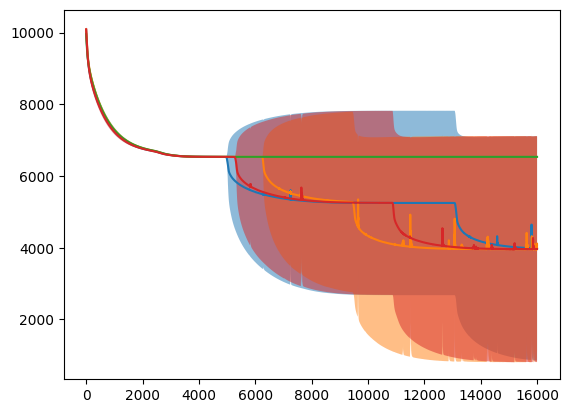

In [3]:
run_k1_c0_i50 = runs(rad=True, n_runs=5, epochs=16000, rad_k=1, rad_c=0, rad_interval=50)
run_k1_c1_i50 = runs(rad=True, n_runs=5, epochs=16000, rad_k=1, rad_c=1, rad_interval=50)
run_k2_c1_i50 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=1, rad_interval=50)
run_k2_c0_i50 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=50)

k1 c1
4066.828188464511
3025.977296321505
k1 c0
3980.8976362943417
3126.396650423792
k2 c1
6533.4860196590425
0.021581851124719793
k2 c0
3962.8766620247857
3148.3557980795426


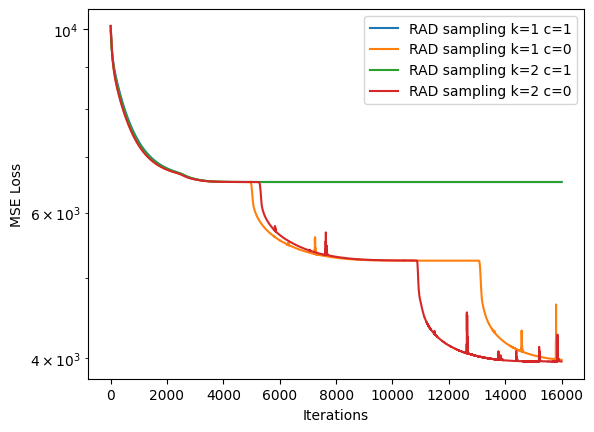

In [6]:
avg_losses = np.mean(run_k1_c1_i50, axis=0)
std_losses = np.absolute(np.std(run_k1_c1_i50, axis=0))
plt.plot(np.percentile(run_k1_c1_i50, 50, axis=0), label=(f"RAD sampling k={1} c={1}"))
print("k1 c1")
print(avg_losses[-1])
print(std_losses[-1])
# plt.fill_between(np.arange(len(run_k1_c1_i50[0])), np.percentile(run_k1_c1_i50, 25, axis=0), np.percentile(run_k1_c1_i50, 75, axis=0), alpha=0.5)


avg_losses = np.mean(run_k1_c0_i50, axis=0)
std_losses = np.absolute(np.std(run_k1_c0_i50, axis=0))
plt.plot(avg_losses, label=(f"RAD sampling k={1} c={0}"))
print("k1 c0")
print(avg_losses[-1])
print(std_losses[-1])
# plt.fill_between(np.arange(len(run_k1_c0_i50[0])), avg_losses - std_losses, avg_losses + std_losses, alpha=0.5)

avg_losses = np.mean(run_k2_c1_i50, axis=0)
std_losses = np.std(run_k2_c1_i50, axis=0)
plt.plot(avg_losses, label=(f"RAD sampling k={2} c={1}"))
print("k2 c1")
print(avg_losses[-1])
print(std_losses[-1])
# plt.fill_between(np.arange(len(run_k2_c1_i50[0])), avg_losses - std_losses, avg_losses + std_losses, alpha=0.5)
# 
avg_losses = np.mean(run_k2_c0_i50, axis=0)
std_losses = np.std(run_k2_c0_i50, axis=0)
plt.plot(avg_losses, label=(f"RAD sampling k={2} c={0}"))
print("k2 c0")
print(avg_losses[-1])
print(std_losses[-1])

# plt.fill_between(np.arange(len(run_k2_c0_i50[0])), avg_losses - std_losses, avg_losses + std_losses, alpha=0.5)

plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.legend()
name = 'american_rad_kc_comp' + str(datetime.now()) + '.png'
plt.savefig('paper_plots/' + name, transparent=False)
plt.show()

100%|██████████| 16000/16000 [01:58<00:00, 134.78it/s]


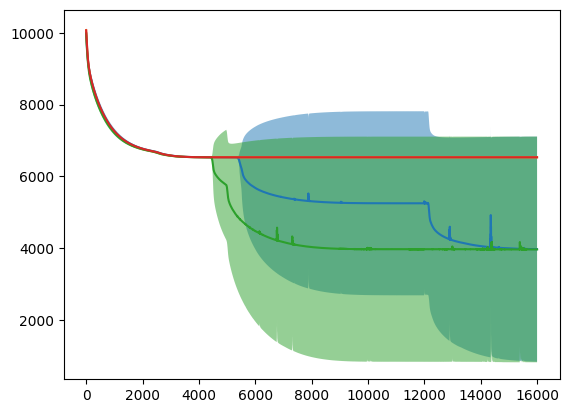

In [7]:
run_i25 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=25)
run_i050 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=50)
run_i250 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=250)
run_i1000 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=1000)

25
3972.7619227799587
3136.2697541760085
50
6533.529499864579
0.05419649403829368
250
3965.824702630518
3144.742339042054
1000
6533.511144256592
0.02314049917437369


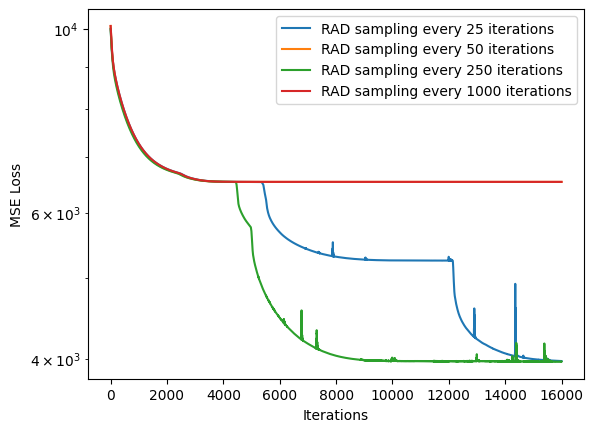

In [9]:
avg_losses = np.mean(run_i25, axis=0)
std_losses = np.absolute(np.std(run_i25, axis=0))
plt.plot(avg_losses, label=(f"RAD sampling every 25 iterations"))
print("25")
print(avg_losses[-1])
print(std_losses[-1])
# plt.fill_between(np.arange(len(run_k1_c1_i50[0])), np.percentile(run_k1_c1_i50, 25, axis=0), np.percentile(run_k1_c1_i50, 75, axis=0), alpha=0.5)


avg_losses = np.mean(run_i050, axis=0)
std_losses = np.absolute(np.std(run_i050, axis=0))
plt.plot(avg_losses, label=(f"RAD sampling every 50 iterations"))
print("50")
print(avg_losses[-1])
print(std_losses[-1])
# plt.fill_between(np.arange(len(run_k1_c0_i50[0])), avg_losses - std_losses, avg_losses + std_losses, alpha=0.5)

avg_losses = np.mean(run_i250, axis=0)
std_losses = np.std(run_i250, axis=0)
plt.plot(avg_losses, label=(f"RAD sampling every 250 iterations"))
print("250")
print(avg_losses[-1])
print(std_losses[-1])
# plt.fill_between(np.arange(len(run_k2_c1_i50[0])), avg_losses - std_losses, avg_losses + std_losses, alpha=0.5)
# 
avg_losses = np.mean(run_i1000, axis=0)
std_losses = np.std(run_i1000, axis=0)
plt.plot(avg_losses, label=(f"RAD sampling every 1000 iterations"))
print("1000")
print(avg_losses[-1])
print(std_losses[-1])

plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.legend()
name = 'american_rad_int_comp' + str(datetime.now()) + '.png'
plt.savefig('paper_plots/' + name, transparent=False)
plt.show()

100%|██████████| 16000/16000 [01:54<00:00, 139.20it/s]


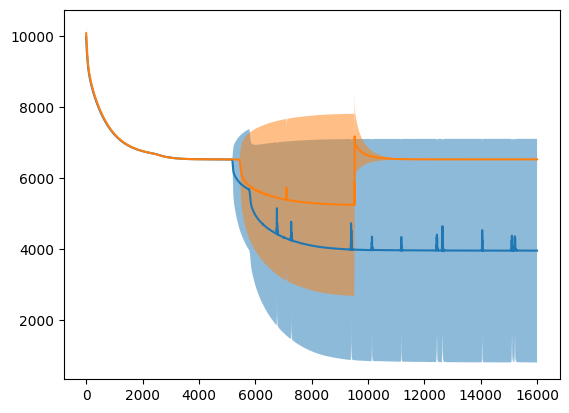

In [11]:
run_i250 = runs(rad=True, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=250)
run_random = runs(rad=False, n_runs=5, epochs=16000, rad_k=2, rad_c=0, rad_interval=25)

3964.155802225135
3146.8838501997643
6533.5165185928345
0.046666604999437075


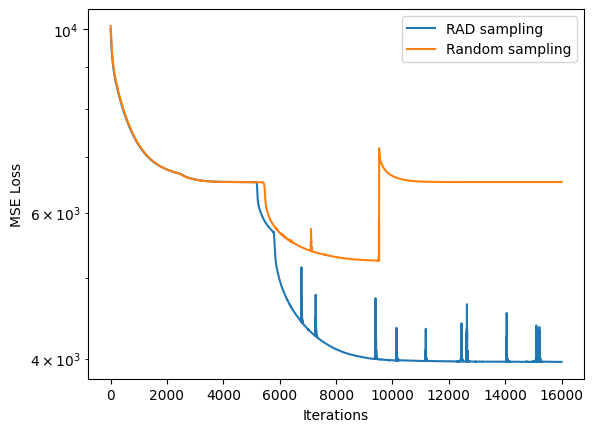

In [13]:
avg_losses = np.mean(run_i250, axis=0)
std_losses = np.std(run_i250, axis=0)
plt.plot(avg_losses, label=(f"RAD sampling"))
print(avg_losses[-1])
print(std_losses[-1])

avg_losses = np.mean(run_random, axis=0)
std_losses = np.std(run_random, axis=0)
plt.plot(avg_losses, label=(f"Random sampling"))
print(avg_losses[-1])
print(std_losses[-1])

plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.legend()
name = 'american_rad_vs_random' + str(datetime.now()) + '.png'
plt.savefig('paper_plots/' + name, transparent=False)
plt.show()